<a href="https://colab.research.google.com/github/IT24100637/2025-Y2-S1-MLB-B4G2-02--AIML---Data-Preprocessing-and-EDA-Pipeline/blob/main/NoteBooks/IT24100637_VarianceThreshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IT24100653_AddNewFeature.csv to IT24100653_AddNewFeature.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
!pip install category_encoders
import category_encoders as ce
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv("IT24100653_AddNewFeature.csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00


Reduced dataset saved as IT24100637_Final.csv


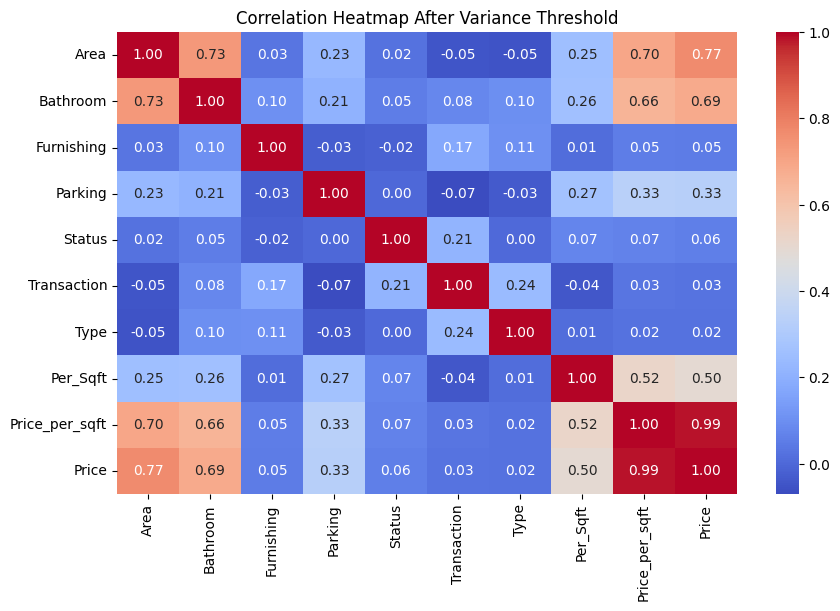

In [5]:
if "Locality" in df.columns:
    df = df.drop(columns=["Locality"])

target = "Price"
y = df[target]
X = df.drop(columns=[target])

encoder = ce.TargetEncoder(cols=X.select_dtypes(include=['object']).columns)
X_encoded = encoder.fit_transform(X, y)

selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X_encoded)

selected_features = X_encoded.columns[selector.get_support()]

df_selected = pd.DataFrame(X_reduced, columns=selected_features)
df_selected[target] = y

df_selected.to_csv("IT24100637_Final.csv", index=False)
print("Reduced dataset saved as IT24100637_Final.csv")

corr = df_selected.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap After Variance Threshold")
plt.show()

In [6]:
from google.colab import files
files.download("/content/IT24100637_Final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>